In [1]:
print("hello")

hello


In [2]:
# cd /content/drive/MyDrive/NLP

In [3]:
# !unzip  /content/drive/MyDrive/NLP/train.csv.zip

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *

In [5]:
!file -i train.csv


train.csv: cannot open `train.csv' (No such file or directory)


In [6]:
data_train = pd.read_csv('/content/drive/MyDrive/NLP/train.csv', encoding='iso-8859-1')

In [7]:
data_train.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [8]:
def func(x):
  if x == 'positive':
    return 2
  if x == 'negative':
    return 1
  if x == 'neutral':
    return 0

In [9]:
train_x = data_train[['text', 'Time of Tweet']].values
train_y = data_train['sentiment'].apply(func).values

[7, 10, 5, 5, 14, 12, 14, 2, 3, 10, 23, 11, 8, 12, 6, 5, 9, 25, 8, 6, 13, 24, 12, 18, 13, 11, 2, 9, 22, 17, 13, 12, 26, 5, 20, 14, 18, 24, 10, 20, 20, 12, 1, 25, 19, 18, 16, 5, 24, 17, 14, 10, 6, 10, 4, 11, 18, 5, 6, 6, 12, 2, 5, 30, 8, 4, 12, 16, 1, 9, 6, 9, 25, 18, 27, 27, 9, 4, 4, 12, 2, 10, 6, 6, 20, 10, 27, 28, 14, 23, 9, 9, 9, 14, 9, 9, 23, 7, 12, 11, 7, 5, 19, 13, 23, 11, 12, 23, 12, 8, 18, 2, 12, 25, 25, 10, 12, 4, 7, 24, 13, 25, 15, 19, 2, 4, 13, 1, 4, 12, 16, 12, 13, 4, 22, 23, 20, 21, 5, 11, 31, 13, 24, 14, 2, 17, 6, 9, 5, 19, 22, 17, 8, 12, 11, 6, 2, 22, 9, 12, 4, 6, 7, 23, 5, 13, 13, 16, 9, 17, 2, 5, 18, 23, 12, 8, 14, 7, 8, 20, 9, 10, 28, 9, 10, 2, 3, 21, 18, 9, 4, 21, 14, 11, 13, 4, 8, 8, 27, 16, 10, 9, 7, 3, 21, 9, 8, 7, 14, 5, 11, 7, 18, 13, 13, 4, 18, 4, 2, 20, 7, 3, 22, 10, 1, 23, 14, 10, 21, 15, 10, 16, 24, 6, 19, 11, 15, 7, 1, 5, 10, 27, 14, 7, 13, 7, 21, 9, 13, 7, 8, 14, 19, 23, 26, 12, 5, 20, 14, 15, 20, 16, 11, 21, 23, 9, 4, 14, 24, 2, 16, 2, 10, 25, 15, 25, 3, 

array([[<Axes: title={'center': 'Population -2020'}>,
        <Axes: title={'center': 'Land Area (Km²)'}>],
       [<Axes: title={'center': 'Density (P/Km²)'}>,
        <Axes: title={'center': 'len'}>]], dtype=object)

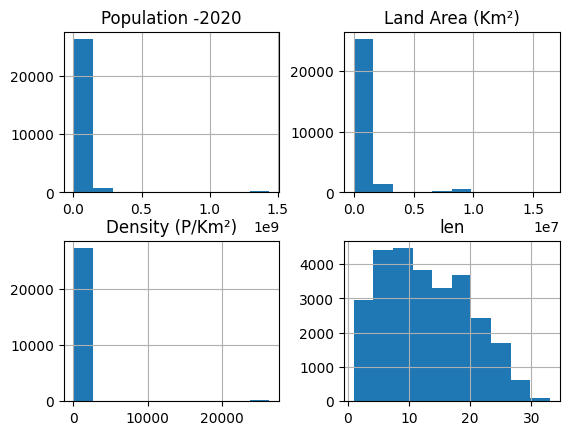

In [10]:
length = []
for x in train_x:
  length.append(len(str(x[0]).split()))

print(length)
data_train['len'] = length
data_train.hist()

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
tokenizer = Tokenizer(oov_token= '<OOV>', lower=True)
text = [str(x[0]) for x in train_x]

In [13]:
tokenizer.fit_on_texts(text)
sequence = tokenizer.texts_to_sequences(text)

In [14]:
padding = pad_sequences(sequence, truncating='post',  padding='post', maxlen=30)

In [15]:
from tensorflow.keras.utils import to_categorical

padding

array([[   2,  166,   20, ...,    0,    0,    0],
       [ 424,  120,    2, ...,    0,    0,    0],
       [   6, 1368,   10, ...,    0,    0,    0],
       ...,
       [ 236,   33,   12, ...,    0,    0,    0],
       [  21,    7,   29, ...,    0,    0,    0],
       [  30,   34, 6351, ...,    0,    0,    0]], dtype=int32)

<Axes: >

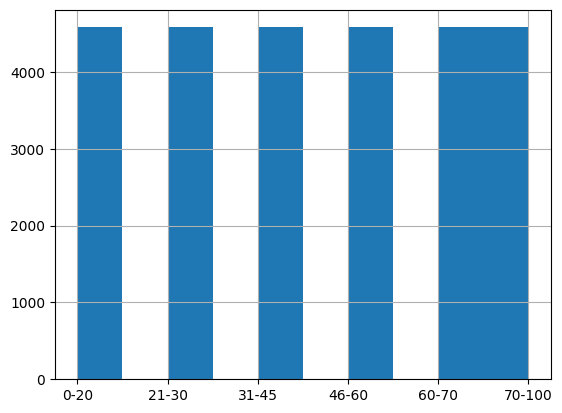

In [16]:
data_train['Age of User'].hist()

In [17]:
embed_size = 200
inputs = 30
vocab_size = len(tokenizer.word_index)
num_class = 3

In [18]:
model = tf.keras.Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=inputs),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(num_class, activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
model.build((None, embed_size))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 200)       │     5,319,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │       135,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,459,707 (20.83 MB)

 Trainable params: 5,459,707 (20.83 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
train_y

array([0, 1, 1, ..., 2, 2, 0])

In [21]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [22]:
model.fit(padding, train_y, epochs=10)

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5791 - loss: 0.8790
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8048 - loss: 0.4990
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8802 - loss: 0.3239
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9243 - loss: 0.2133
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9480 - loss: 0.1482
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9623 - loss: 0.1082
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9724 - loss: 0.0772
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9781 - loss: 0.0644
Epoch 9/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9832 - loss: 0.0473
Epoch 10/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9879 - loss: 0.0344


In [23]:
model.save('/content/drive/MyDrive/NLP/model.h5')

In [26]:
test_data = pd.read_csv('/content/drive/MyDrive/NLP/test.csv', encoding='iso-8859-1').dropna()

In [27]:
test_data

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0


In [28]:
test_x = test_data['text'].values
test_y = test_data['sentiment'].apply(func).values

TypeError: only length-1 arrays can be converted to Python scalars

In [31]:
test_seq = tokenizer.texts_to_sequences(test_x)

In [32]:
pad_test = pad_sequences(test_seq, truncating='post',  padding='post', maxlen=30)

In [41]:
y = model.predict(pad_test)
yhat = np.argmax(y, axis=1)
yhat

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0, 2, 1, ..., 1, 2, 2])

In [42]:
from sklearn.metrics import classification_report
print(classification_report(yhat, test_y))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      1425
           1       0.69      0.72      0.70       961
           2       0.75      0.72      0.74      1148

    accuracy                           0.70      3534
   macro avg       0.70      0.70      0.70      3534
weighted avg       0.70      0.70      0.70      3534



In [45]:
import json
tokenize_js = tokenizer.to_json()
with open('/content/drive/MyDrive/NLP/tokenizer.json', 'w', encoding='utf-8') as f:
  json.dump(tokenize_js, f)

In [ ]:
# with open('tokenizer.json', 'r') as f:
#     data = json.load(f)
# tokenizerr = tokenizer_from_json(data)